0.2375


C:\Users\Tubi\Anaconda3\lib\site-packages\numpy\matrixlib\defmatrix.py:318: VisibleDeprecationWarning: boolean index did not match indexed array along dimension 1; dimension is 10 but corresponding boolean dimension is 5
  out = N.ndarray.__getitem__(self, index)


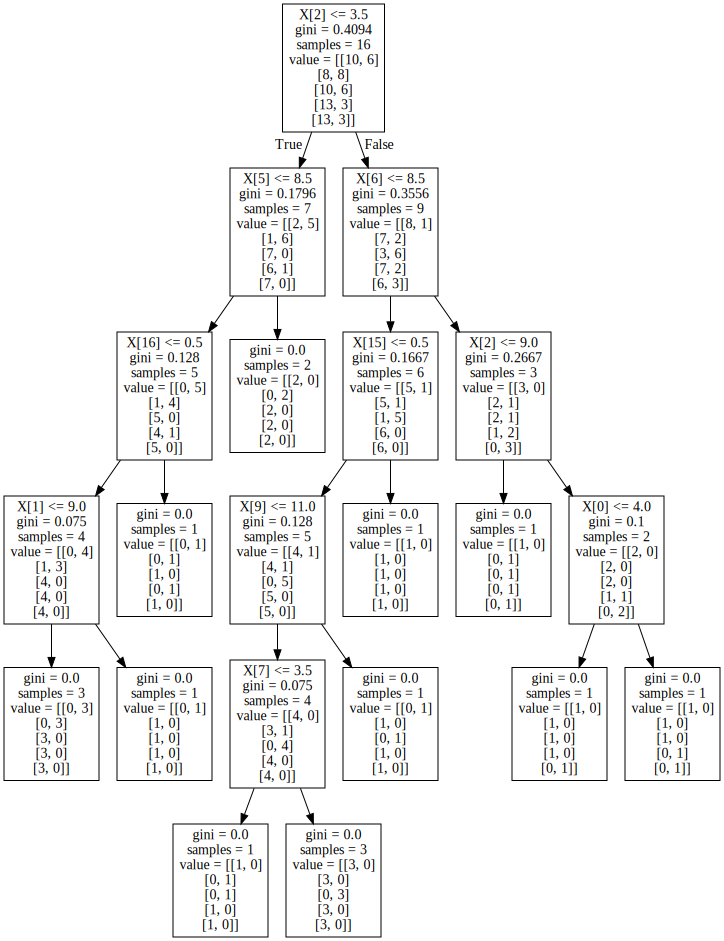

In [4]:
from sklearn_ubu.disturbing_neighbors import DisturbingNeighbors
from sklearn.datasets import make_multilabel_classification
from sklearn.metrics import hamming_loss
from sklearn.model_selection import train_test_split
import numpy as np
from sklearn import tree
import graphviz

seed = 0

X,y=make_multilabel_classification(n_samples=32, n_features=10, random_state=seed) 
dn=DisturbingNeighbors(random_state=seed)

X_train, X_test, y_train, y_test = train_test_split(X, y, test_size=0.5, train_size=0.5, 
                                                    random_state=seed)

X_train=np.matrix(np.array(X_train))
X_test=np.matrix(np.array(X_test))
y_train=np.matrix(np.array(y_train))
y_test=np.matrix(np.array(y_test))

arbol=dn.fit(X_train,y_train)

y_predict=dn.predict(X_test)


dist=hamming_loss(y_test, y_predict)

print(dist) 
dot_data = tree.export_graphviz(arbol, out_file=None) 
graph = graphviz.Source(dot_data) 
graph

